# Problem Set 8
### MGMT 860/960 Deterministic Methods in Operations Research

Chris Gervais - 20042208

In [444]:
import matplotlib.pyplot as plt
import numpy as np
import random
import warnings
import math
from pyomo.environ import *

warnings.filterwarnings('ignore')

## Problem 1:

Consider the unconstrained minimization of
$f(x)=-\ln (3-x_1-x_2)-2\ln x_1-\ln x_2$. 

$\mathbf 1:$ Find the exact optimal solution.

First, we find the partial derivatives of the function:

$\frac{df}{dx_1} = \frac{1}{3-x_1-x_2} - \frac{2}{x_1}$

$\frac{df}{dx_2} = \frac{1}{3-x_1-x_2} - \frac{1}{x_2}$

Setting both to zero, and converting to matrix form we get:

$$\mathbf A = \begin{bmatrix}
3 & 2   \\
1 & 2  \\ 
\end{bmatrix},
\mathbf x = \begin{bmatrix}
 x_1   \\
 x_2  \\ 
\end{bmatrix},
\mathbf b = \begin{bmatrix}
 6   \\
 3  \\ 
\end{bmatrix}
$$

Solving the linear system of equations, we get the following:

In [336]:
a = np.matrix([[3, 2], [1, 2]])
b = np.matrix([[6], [3]])

x_1, x_2 = np.linalg.inv(a).dot(b)

print(f"x_1 = {round(x_1.item(0), 2)}")
print(f"x_2 = {round(x_2.item(0), 2)}")

x_1 = 1.5
x_2 = 0.75


Finally, confirming the answer using Pyomo:

In [337]:
model = ConcreteModel()
model.x = Var([1, 2], domain=NonNegativeReals)

model.OBJ = Objective(
    expr = -log(3 - model.x[1] - model.x[2]) - 2 * log(model.x[1]) - log(model.x[2]), 
    sense=minimize
)
solver = SolverFactory('ipopt')
solver.solve(model)

print(f"The optimal solution occurs at: \nx_1 = {round(model.x[1](), 2)}",
      f" x_2 = {round(model.x[2](), 2)}, objective function = {model.OBJ()}")

The optimal solution occurs at: 
x_1 = 1.5  x_2 = 0.75, objective function = -0.23556607131276697


Finally, we can visually inspect the solution to see that it appears where we would expect it:

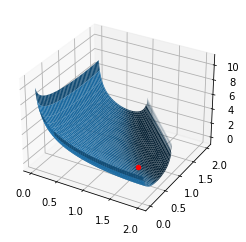

In [506]:
def f(x):
    return -np.log(3-x[0]-x[1]) - 2 * np.log(x[0]) - np.log(x[1])

fig = plt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[0:2:100j,0:2:100j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)
ax.scatter(1.5, 0.75, -0.2355, color='red')
plt.show()

$\mathbf 2:$ Choose either Newton's algorithm or the steepest descent algorithm to numerically find the optimal solution. You can choose any software to carry out the computational work (including Excel). State your choice of method and termination criterion.  Report the iterates $\mathbf x^k$, direction $\mathbf d^k$  step size $\alpha^k$, and the objective function value respect to $f(\mathbf x^k)$ in each iteration $k$ in a table.



In [517]:
def my_gradient_descent(iterations,threshold,x_init,
                     obj_func,grad_func,learning_rate=0.05,momentum=0.8):
    
    x = x_init
    x_iterates = x
    f_history = [obj_func(x)]
    delta_x = np.zeros(x.shape)
    i = 0
    diff = math.inf
    
    while  i < iterations and diff > threshold:
        # adding some memory (momentum) to the delta_x seems to help a lot
        delta_x = - learning_rate * grad_func(x) + momentum * delta_x
        print(f"Iteration {i + 1} -> Iterate: {x} -> Step: {delta_x} -> Z: {f_history[-1]}")
        x = x + delta_x
        x_iterates = np.vstack((x_iterates, x))
        f_history = np.vstack((f_history, obj_func(x)))
        i += 1
        diff = np.absolute(f_history[-1] - f_history[-2])
    
    print(f'\nFinished in {i} steps with tolerance {diff[0]}.')
    print(f'\nOptimal solution is (x_1, x_2) = {round(x[0], 4), round(x[1], 4)}',
         f"with objective {obj_func(x)}.")
    
    return x_iterates, f_history

def f(x):
    return np.asarray(-math.log(3 - x[0] - x[1]) - 2*math.log(x[0]) - math.log(x[1]))

def grad(x):
    x_1 = ((1 / (3 - x[0] - x[1])) - 2 / x[0])
    x_2 = ((1 / (3 - x[0] - x[1])) - 1 / x[1])
    
    return np.asarray([x_1, x_2])

def solve_fx():
    # Setting up
    rand = np.random.RandomState(19)
    x_init = rand.uniform(0, 1.5 ,2)
    lr = 0.01
    alpha = 0.8105
    
    return my_gradient_descent(1000, 0.000001, x_init, f, grad, lr, alpha)
            
w_history, f_history = solve_fx()

Iteration 1 -> Iterate: [0.1463004  1.14187458] -> Step: [0.13086331 0.00291581] -> Z: 3.1739550959310563
Iteration 2 -> Iterate: [0.27716371 1.14479039] -> Step: [0.17188728 0.00476154] -> Z: [1.97488502]
Iteration 3 -> Iterate: [0.44905098 1.14955192] -> Step: [0.17671727 0.00542253] -> Z: [1.1243958]
Iteration 4 -> Iterate: [0.62576826 1.15497445] -> Step: [0.16698835 0.00485145] -> Z: [0.59523022]
Iteration 5 -> Iterate: [0.79275661 1.1598259 ] -> Step: [0.15102519 0.00300679] -> Z: [0.26988055]
Iteration 6 -> Iterate: [0.9437818  1.16283269] -> Step: [ 0.13240388 -0.00015668] -> Z: [0.07759865]
Iteration 7 -> Iterate: [1.07618568 1.16267601] -> Step: [ 0.11275928 -0.00466436] -> Z: [-0.02463009]
Iteration 8 -> Iterate: [1.18894496 1.15801165] -> Step: [ 0.09290012 -0.01045789] -> Z: [-0.06672539]
Iteration 9 -> Iterate: [1.28184508 1.14755376] -> Step: [ 0.07337268 -0.01728731] -> Z: [-0.07316872]
Iteration 10 -> Iterate: [1.35521775 1.13026645] -> Step: [ 0.05479058 -0.02459964] 

$\mathbf 3:$ Find the (numerical) rate of convergence from your results in $\mathbf 2$.

In [518]:
opt = model.OBJ()
rate_of_convergence = []
for i in range(len(f_history) - 1):
    rate_of_convergence.append(abs(f_history[i+1] - opt) / abs(f_history[i] - opt))
    
print(f"The rate of convergence is approximately {round(np.mean(rate_of_convergence), 4)}.")
print(f"This was made possible by introducing momentum to each step! :D")

The rate of convergence is approximately 0.9976.
This was made possible by introducing momentum to each step! :D


## Problem 2:

Suppose $f:\mathbb{R}^n\to \mathbb{R}$ is convex, $\lambda_0>0$, $\lambda_i\le0$ for $i=1,..,k$ and $\lambda_0+\lambda_1+...+\lambda_k=1$. Let $\mathbf x_0, \mathbf x_1,...,\mathbf x_k\in \mathbb{R}^n$. Prove or disprove the following inequality:

$$
f(\lambda_0\mathbf x_0+\lambda_1\mathbf x_1+...+\lambda_k\mathbf x_k)\ge \lambda_0f(\mathbf x_0)+\lambda_1f(\mathbf x_1)+...+\lambda_kf(\mathbf x_k).
$$

First, we note that $\sum_{i=1}^{k} \lambda_i = 1 - \lambda_0$. If $0 < \lambda_0 < 1$, then $\sum_{i=1}^{k} \lambda_i > 0$, which contradicts $\lambda_i\le0$ for $i=1,..,k$. Therefore, not only must $\lambda_0>0$, but in order to satisfy all constraints;

$$\lambda_0 \ge 1$$

Next, we use definition 1.1 from section 1.3 of Introduction to Linear Optimization, adapted for more than two input vectors, to define convexity of a function, namely;

$$f(\lambda_0 \mathbf x_0 + \lambda_1 \mathbf x_1 + ... + \lambda_k \mathbf x_k) \le \lambda_0 f(\mathbf x_0) + \lambda_1 f(\mathbf x_1) + ... \lambda_k f(\mathbf x_k)$$

$$\lambda_0+\lambda_1+...+\lambda_k=1$$

In the first case, where $\lambda_0 = 1$; 

$$\sum_{i=1}^{k} \lambda_i = 0$$,

$$f(\lambda_0 \mathbf x_0 + \lambda_1 \mathbf x_1 + ... + \lambda_k \mathbf x_k) = \lambda_0 f(\mathbf x_0) + \lambda_1 f(\mathbf x_1) + ... \lambda_k f(\mathbf x_k)$$

Or, simply; 

$$
f(\mathbf x_0) = f(\mathbf x_0)
$$

In the second case, where $\lambda_0 > 1$;

$$\sum_{i=1}^{k} \lambda_i < 0 \implies
f(\lambda_0\mathbf x_0+\lambda_1\mathbf x_1+...+\lambda_k\mathbf x_k) > \lambda_0 f(\mathbf x_0) + \lambda_1f(\mathbf x_1)+...+\lambda_kf(\mathbf x_k)
$$

Finally, combining (7) and (10);

$$
f(\lambda_0\mathbf x_0+\lambda_1\mathbf x_1+...+\lambda_k\mathbf x_k)\ge \lambda_0f(\mathbf x_0)+\lambda_1f(\mathbf x_1)+...+\lambda_kf(\mathbf x_k).
$$

Finally, we supplement this proof below by experimentally testing five functions fron the previous assignment that are known to be convex, namely:

$\mathbf 1: f(x) = x^2$

$\mathbf 2: f(x) = x^4$

$\mathbf 3: f(x) = e^x$

$\mathbf 4: f(x) = e^{x^2}$

$\mathbf 5: f(x) = x^2 + e^{x^2}$

In [519]:
import math
import random

x_vals = [-1, 2, -5]
lambda_0 = 2.5
assert lambda_0 >= 1
lambdas = [lambda_0]
n = len(x_vals)
for i in range(1, n):
    lambdas.append((1 - lambda_0)/(n - 1))

assert sum(lambdas) == 1.0
assert len(lambdas) == len(x_vals)

def x_2_e_x(x):
    return x**2 + math.exp(x**2)

def x_2(x):
    return x**2

def x_4(x):
    return x**4

def e_x(x):
    return math.exp(x)

def e_x_2(x):
    return math.exp(x**2)

def f_of_all(x_vals, lambdas, f):
    return f(sum([x_i * lambda_i for x_i, lambda_i in zip(x_vals, lambdas)]))

def f_of_each(x_vals, lambdas, f):
    return sum([f(x_i) * lambda_i for x_i, lambda_i in zip(x_vals, lambdas)])

for f in [x_2, x_4, e_x, e_x_2, x_2_e_x]:
    f_of_all_val = f_of_all(x_vals, lambdas, f)
    f_of_each_val = f_of_each(x_vals, lambdas, f)
    print(f"LHS {f_of_all_val} >= RHS ({f_of_each_val})")
    assert f_of_all_val >= f_of_each_val

LHS 0.0625 >= RHS (-19.25)
LHS 0.00390625 >= RHS (-478.25)
LHS 0.7788007830714049 >= RHS (-4.627146931518696)
LHS 1.0644944589178593 >= RHS (-54003674537.19232)
LHS 1.1269944589178593 >= RHS (-54003674556.44232)


## Problem 3:

Let $S=\{x_1,...,x_k), x_i\in \mathbb{R}$ for $i,...,k$ denote a set of $k$ real numbers. 

Consider the following three measures of the spread of a set of numbers.

$\mathbf 1:$ Spread: $\phi_1(S)=\max_{x\in S}x-\min_{x\in S}x$

This function can equally be represented as $\phi_1(S)=\max_{x\in S}x+\max_{-x\in S}$, which is equivalent to the sum of two piecewise linear functions. Since we know the sum of piecewise linear functions is convex, the spread operator is also convex.

$\mathbf 2:$ Statistical standard deviation: $\phi_2(S)=\left(\frac{1}{k}\sum_{x\in S}x^2-\left(\frac{1}{k}\sum_{x\in S}x\right)^2\right)^{1/2}$

$\mathbf 3:$ Mean absolution deviation from the median: $\phi_3(S)=\frac{1}{k}\sum_{x\in S}|x-\text{med}(S)|$,
where $\text{med}(S)$ denotes the median of the numbers in $S$. Note that if $k=2m-1$ is odd, then  $\text{med}(S)$ is defined as the value of the $m^\text{th}$ biggest element in $S$. If $k=2m$ is even, then $\text{med}(S)$ is the average of the $m^\text{th}$ and $m+1^\text{th}$ biggest elements in $S$.


For each of the above functions, either prove that it is convex, or give a counterexample showing it is not convex.

Honestly, I have no idea how to even approach parts 2 and 3 of this question. I've been staring at them all week and have made zero progress on either. Would welcome the solutions when this is made available.

## Problem 4:

$$
 \begin{array}{l c c c l}
    \mathrm{minimize}        &(x_1-12)^2&+& (x_2+6)^2 \\ 
    \mathrm{subject~to} &   x_1^2 + 3x_1 &+ & x_2^2-4.5x_2 &\le 6.5 \\ 
 &  (x_1-9)^2 &+& x_2^2 &\le 64 \\ 
 &  8x_1 &+& 4x_2 &= 20
  \end{array}
 $$
 
 Determine whether or not the point $\bar{\mathbf x}=(\bar{x}_1,\bar{x}_2)=(2,1)$ is an optimal solution.
 
To start, we first define the following functions and check for feasibility:
 
 $g_1(x) = x_1^2 + 3x_1 + x_2^2 - 4.5x_2 - 6.5 \le 0$
 
 $g_2(x) = (x_1 - 9)^2 + x_2^2 - 64 \le 0$
 
 $h_1(x) = 8x_1 + 4x_2- 20 = 0$


In [510]:
point = [2, 1]

def g1(x):
    assert len(x) == 2
    return x[0]**2 + 3*x[0] + x[1]**2 - 4.5*x[1] - 6.5

def g2(x):
    assert len(x) == 2
    return (x[0] - 9)**2 + x[1]**2 - 64

def h1(x):
    assert len(x) == 2
    return 8*x[0] + 4*x[1] - 20

g_1_at_x = g1(point)
g_2_at_x = g2(point)
h_1_at_x = h1(point)

assert g_1_at_x <= 0
assert g_2_at_x <= 0
assert h_1_at_x == 0

print(f"g_1(2, 1) = {g_1_at_x}")
print(f"g_2(2, 1) = {g_2_at_x}")
print(f"h_1(2, 1) = {h_1_at_x}")

g_1(2, 1) = 0.0
g_2(2, 1) = -14
h_1(2, 1) = 0


Therefore, the point $(2, 1)$ is feasible. Now, we check for optimality conditions by calculating the partial derivatives and obtaining the gradient vectors at the point.

$\nabla f_{x_1} = 2(x_1 - 12)$, $\nabla f_{x_1}(2, 1) = -20$

$\nabla f_{x_2} = 2(x_2 + 6)$, $\nabla f_{x_2}(2, 1) = 14$

$\nabla g_{1, x_1} = 2(x_1 + 3)$, $\nabla g_{1, x_1}(2, 1) = 7$

$\nabla g_{1, x_2} = 2(x_2 -4.5)$, $\nabla g_{1, x_2}(2, 1) = -2.5$

$\nabla g_{2, x_1} = 2(x_1 - 9)$, $\nabla g_{2, x_1}(2, 1) = -14$

$\nabla g_{2, x_2} = 2x_2$, $\nabla g_{2, x_2}(2, 1) = 2$

$\nabla h_{1, x_1} = 8$, $\nabla h_{1, x_1}(2, 1) = 8$

$\nabla h_{1, x_2} = 4$, $\nabla h_{1, x_2}(2, 1) = 4$

More concretely;

$$\nabla f(x) = \begin{pmatrix}
 -20   \\
 14  \\ 
\end{pmatrix},
\nabla g_1(x) = \begin{pmatrix}
 7   \\
 -2.5  \\ 
\end{pmatrix},
\nabla g_2(x) = \begin{pmatrix}
 -14   \\
 2  \\ 
\end{pmatrix},
\nabla h_1(x) = \begin{pmatrix}
 8   \\
 4  \\ 
\end{pmatrix}$$

We note that the above gradient vectors are linearly independent and thus the KKT conditions are necessary.

$\nabla f(x) + u \nabla g(x) + v \nabla h(x) = 0$

$ \begin{bmatrix}
 -20   \\
 14  \\ 
\end{bmatrix} + u_1 \begin{bmatrix}
 7   \\
 -2.5  \\ 
\end{bmatrix} + u_2 \begin{bmatrix}
 -14   \\
 2  \\ 
\end{bmatrix} + v_1 \begin{bmatrix}
 8   \\
 4  \\ 
\end{bmatrix} = \begin{bmatrix}
0   \\
0  \\ 
\end{bmatrix}$

We not there are two equations and three unknowns. Plugging in $u_2=0$ yields the solution:

$\begin{pmatrix}
u_1 \\
u_2 \\ 
v_1 \\
\end{pmatrix} = \begin{pmatrix}
4  \\
0  \\ 
-1 \\
\end{pmatrix}$

Since $u_i \ge 0$ and $u_i g_i(x) = 0 \;\; \forall i \in m$, we can confirm that the point $(x_1, x_2) = (2, 1)$ is a KKT point and is a candidate to be an optimal solution. Finally, we know this a quadratic formulation is a convex  problem, and therefore the point is optimal.

## Problem 5:

Consider the problem:
$$
 \begin{array}{l r l l}
    \mathrm{minimize}        &\mathbf x^T M\mathbf x& \\ 
    \mathrm{subject~to} &  ||\mathbf x|| &\le 2, 
  \end{array}
$$
 
where $M$ an $n\times n$ symmetric matrix. 

$\mathbf 1:$ Apply the theorem(s) in class to find the KKT point(s) for this problem.  

Let $\mathbf z = \mathbf x$, then the problem can be formulated as:

$$
 \begin{array}{l r l l}
    \mathrm{minimize}        &\mathbf z^T M\mathbf z& \\ 
    \mathrm{subject~to} &  \mathbf z &\le 2 \\
                        & \mathbf x & \le \mathbf z \\
                        & \mathbf - \mathbf x & \le \mathbf z \\
  \end{array}
$$


Next, we define the following;

$$f(x, z) = \mathbf z^T \mathbf A \mathbf z, \;\;
g_1(x, z) = \mathbf x - \mathbf z,\;\;
g_2(x, z) = -\mathbf x - \mathbf z,\;\;
g_3(x, z) = \mathbf z - 2$$

Then, the derivatives are as follows;

$$\nabla f(x, z) =  \begin{pmatrix}
0  \\
2 \mathbf z^T \mathbf M  \\ 
\end{pmatrix},\;\;
\nabla g_1(x, z) =  \begin{pmatrix}
1  \\
-1 \\ 
\end{pmatrix},\;\;
\nabla g_2(x, z) =  \begin{pmatrix}
-1  \\
-1 \\ 
\end{pmatrix},\;\;
\nabla g_3(x, z) =  \begin{pmatrix}
0  \\
1 \\ 
\end{pmatrix}
$$

To be a KKT point, we must satisfy the following conditions;

$$\nabla f + u_1 \nabla g_1 + u_2 \nabla g_2 + u_3 \nabla g_3 = \mathbf 0$$

As well as;

$$
u_1 (\mathbf x - \mathbf z) = \mathbf 0, \;\;
u_2 (-\mathbf x - \mathbf z) = \mathbf 0, \;\;
u_3 (\mathbf z - \mathbf 2) = \mathbf 0
$$

And;

$$ \mathbf u \ge \mathbf 0$$

Given the transformation of the norm, where we substituted $\mathbf x$ for $\mathbf z$, we note that all three constraints cannot bind simultaneously. Further, the constraint with multiplier $u_3$ cannot bind without either the $u_1$ or $u_2$ constraint binding simultaneously. The remaining cases and corresponding KKT points are as follows;

$\mathbf a:$ Constraints with multipliers $u_1$ and $u_2$ are binding, then;

$$\mathbf x = \mathbf z, \;\;
-\mathbf x = \mathbf z \;\; \implies \mathbf x = \mathbf 0, \;\; \mathbf z = \mathbf 0 \implies u_1 = u_3 = 0$$


$\mathbf b:$ Constraints with multipliers $u_1$ and $u_3$ are binding, then;

$$\mathbf x = \mathbf z, \;\;
\mathbf z = \mathbf 2 \;\; \implies \mathbf x = \mathbf 2, \;\; \mathbf z = \mathbf 2 \implies u_1 = u_3 = 1$$

$\mathbf c:$ Constraints with multipliers $u_2$ and $u_3$ are binding, then;

$$-\mathbf x = \mathbf z, \;\;
\mathbf z = \mathbf 2 \;\; \implies \mathbf x = -\mathbf 2, \;\; \mathbf z = \mathbf 2 \implies u_2 = u_3 = 1$$


$\mathbf 2:$ Find the optimal solution for this problem. 

In [511]:
model = ConcreteModel()
model_size = 5
ind = range(model_size)
vals = [(i, j) for i in ind for j in ind]
M = np.ones((model_size, model_size))
model.M = Param(ind, ind, initialize=1)
model.x = Var(ind, domain=Reals)
model.z = Var(ind, domain=Reals)

model.OBJ = Objective(
    expr = sum([model.M[i, j] * model.z[i] * model.z[j] for i, j in vals]),
    sense=minimize
)

model.cons = ConstraintList()
for i in ind:
    model.cons.add(model.z[i] <= 2)
    model.cons.add(model.x[i] <= model.z[i])
    model.cons.add(-1 * model.x[i] <= model.z[i])

solver = SolverFactory('ipopt')
solver.solve(model)

print(f"Values for x: {[model.x[i]() for i in ind]}")
print(f"Values for z: {[round(model.z[i](), 1) for i in ind]}")
print(f"Optimal objective value: {round(model.OBJ(), 2)}")

Values for x: [0.0, 0.0, 0.0, 0.0, 0.0]
Values for z: [0.0, 0.0, 0.0, 0.0, 0.0]
Optimal objective value: 0.0


## Problem 6:

Prove the theorem in class. Let $P=\{\mathbf x\in \mathbb{R}^n|\mathbf A\mathbf x\ge \mathbf b\}$. If $P$ is nonempty, then there exists a feasible solution with size less than $4n^2\phi$, where $\phi$ is the maximum size required to represent each inequality in $\mathbf A\mathbf x\le \mathbf b$.

First, we note that because we can represent each inequality in the form $\mathbf A\mathbf x\le \mathbf b$, we make the assumption that $\mathbf A$ is of rank $m$. Then, $\mathbf x = \mathbf A^{-1}\mathbf b$ is a solution to this system of equations. This operation fundamentally uses Cramer's rule to calculate each solution $x_i \in \mathbf x$, that is;

$$x_i = \frac{det(\mathbf A_j)}{det(\mathbf A)}$$

where $\mathbf A_j$ is obtained by replacing the $j^{th}$ column of $\mathbf A$ with $\mathbf b$. Further, we know these matricies will be bounded by size $m \phi$, that is, the length of the matrix multiplied by the size required to represent each inequality in $\mathbf A$. Each of the two determinants at most doubles this size because we must in the worst scenario case loop through each index once. This leaves the size of each entry $x_i$ at a total size of $4 m \phi$. Since $\mathbf x \in \mathbb{R}^n$, there are $n$ entries of $x_i$ and the total size is of $4 m n \phi$. Relaxing the rank $m$ assumption, we find an upper bound on the size of $4 n^2 \phi$. Therefore, if $P$ is nonempty, there exists a feasible solution with size at least less than $4n^2 \phi$.